<a href="https://colab.research.google.com/github/mrromaniuc/quantum-computing/blob/main/IBMCertifiedAssociateDeveloperQiskit/01.2-Measure_quantum_circuits_in_classical_registers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install qiskit
!pip install qiskit-aer
!pip install imgaug==0.2.5
!pip install pylatexenc

In [2]:
#Setting configuration to use matplotlib in drawings
!mkdir ~/.qiskit
!echo "[default]" > ~/.qiskit/settings.conf
!echo "circuit_drawer = mpl" >> ~/.qiskit/settings.conf
!more ~/.qiskit/settings.conf

[default]
circuit_drawer = mpl


References: https://www.youtube.com/watch?v=IvhqbvsSrjU
            https://youtu.be/w951uiUBntw

## Measure Quantum Circuits in Classical Registers

### measure() using Quantum and Classical Registers

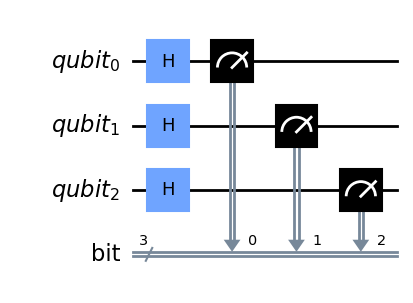

In [4]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

qr = QuantumRegister(3, "qubit")
cr = ClassicalRegister(3, "bit")

qc = QuantumCircuit(qr, cr)
qc.h(qr)
qc.measure(qr, cr)
qc.draw()

### Using measure() on individual qubits

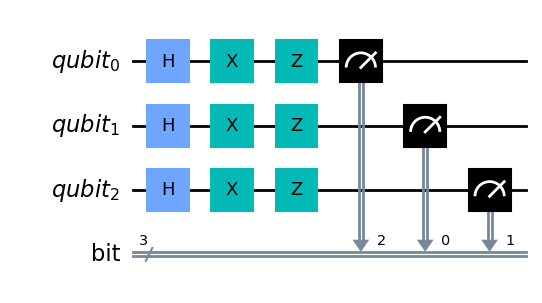

In [10]:
#Note the Quantum and Classical bits are not aligned on the index 0->2, 1->0, 2->1
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

qr = QuantumRegister(3, "qubit")
cr = ClassicalRegister(3, "bit")

qc = QuantumCircuit(qr, cr)
qc.h(qr)
qc.x(qr)
for i in qr:
  qc.z(i)

for i in range(3):
  qc.measure(i, i-1)

display(qc.draw())

### measure_all() and QuantumRegister

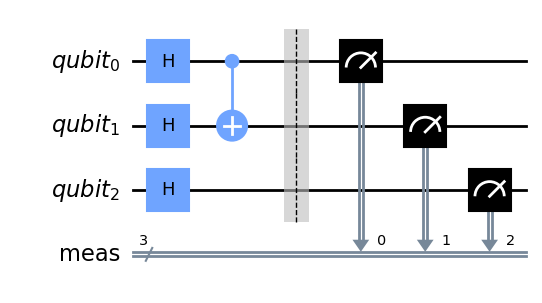

In [11]:
#Note the classical bits were included with the name "meas"
from qiskit import QuantumRegister, QuantumCircuit

qr = QuantumRegister(3, "qubit")

qc = QuantumCircuit()
qc.add_register(qr)   #including more register after creating the circuit
qc.h(qr)              #applying all operation to all qubits in the register
qc.cx(qr[0], qr[1])   #Using inndexes
qc.measure_all()
qc.draw("mpl")

### measure_all() ALWAYS adds new classical bits

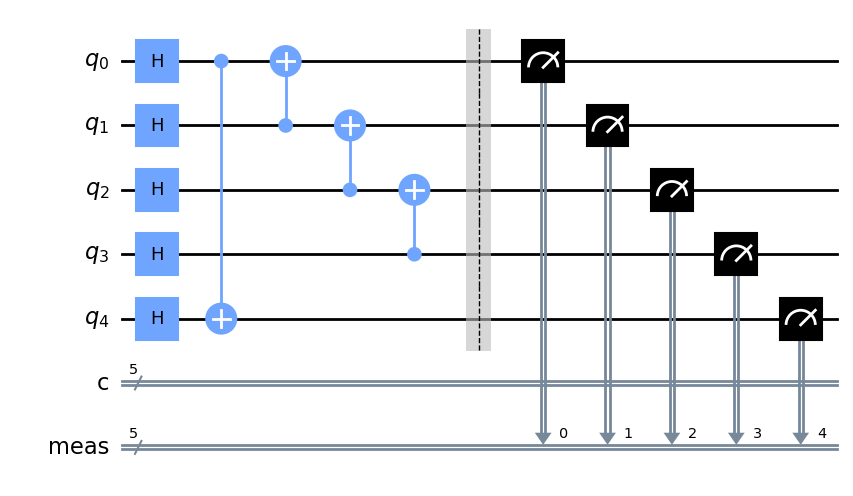

In [25]:
#NOTE the classical bits created in QuantumCircuit call are NOT used
#Instead, new classical bits (register named "meas") are created
from qiskit import QuantumCircuit

qc = QuantumCircuit(5, 5)
qc.h(range(5))
for i in range(4):
  qc.cx(i, i-1)
qc.measure_all()

qc.draw()

### Measuring midway through quantum circuit

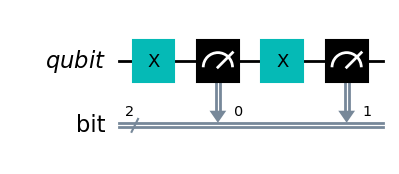

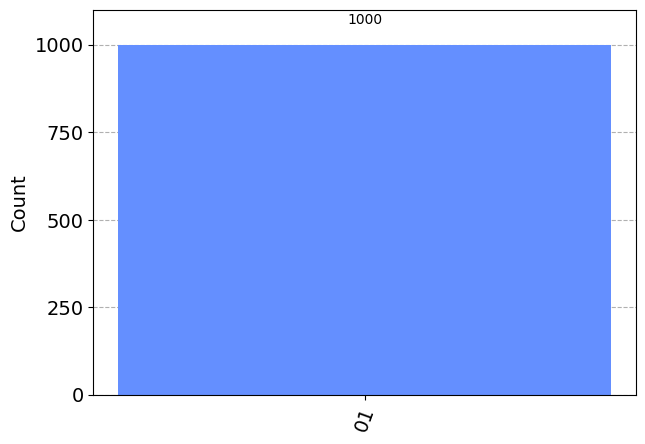

In [12]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

qr = QuantumRegister(1, "qubit")
cr = ClassicalRegister(2, "bit")

qc = QuantumCircuit(qr, cr)
qc.x(qr)
qc.measure(qr, cr[0]) #first measure
qc.x(qr)
qc.measure(qr, cr[1]) #second measure on same qubitb
display(qc.draw("mpl"))

from qiskit.providers.aer import QasmSimulator
sim = QasmSimulator()
job = sim.run(qc, shots=1000)
result = job.result()
counts = result.get_counts(qc)

from qiskit.visualization import plot_histogram
plot_histogram(counts)

### Superposition colapsing after first measure

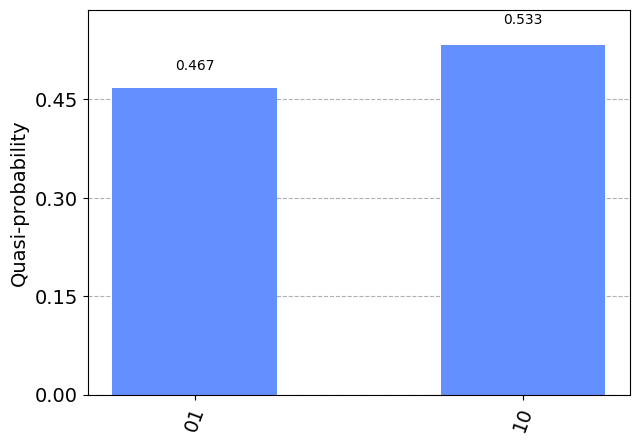

In [16]:
#Measuring a superposition colapses it
from qiskit import QuantumCircuit, Aer

qc=QuantumCircuit(1,2)
qc.h(0)
qc.measure(0,0)
qc.x(0)
qc.measure(0,1)
qc.draw()

be = Aer.get_backend("qasm_simulator")
result = be.run(qc, shots=1000).result()
counts = result.get_counts()

from qiskit.visualization import plot_distribution
plot_distribution(counts)

In [20]:
import qiskit.tools.jupyter
%qiskit_version_table